# Scan aerosols for LSST Site

- Author :Sylvie Dagoret-Campagne

- creation : Friday 22 April 2016


In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline

In [2]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5'

In [6]:
h5_files = [f for f in os.listdir(path) if f.endswith('.h5')]  
#print(h5_files)
full_h5file=h5_files
ix=0
nbfiles=0
for file in h5_files:
    fname = os.path.join(path, file)
    full_h5file[ix]=fname
    ix=ix+1 
    nbfiles=nbfiles+1
print 'number of files ',nbfiles

number of files  24


In [9]:
full_h5file[0]

'/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2013-01D.h5'

In [10]:
h5f = h5py.File(full_h5file[0], "r")  # file on which one works

In [11]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)

In [12]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)

In [18]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude

In [32]:
aod_shape=aod_mean.shape    # get the original size of the array
aod_arr=np.array(aod_mean)  # convert in a numpy array
aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data

In [13]:
all_longitude=longitude[0,:]    # coordinates for X

In [14]:
all_latitude=latitude[0,:]      # coordinate for Y

In [15]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m

In [37]:
lsst_long_indexes=np.where(np.logical_and(all_longitude>=Longitude_lsst-2.5, all_longitude<=Longitude_lsst+2.5))
lsst_lat_indexes=np.where(np.logical_and(all_latitude>=Latitude_lsst-1, all_latitude<=Latitude_lsst+1))
lsst_lat_index=lsst_lat_indexes[0]
lsst_long_index=lsst_long_indexes[0]

In [38]:
print('lsst_long_indexes=',lsst_long_indexes)
print('lsst_lat_indexes=',lsst_lat_indexes)
print('lsst_aod = ',aod_mean_clean[lsst_lat_index,lsst_long_index])


('lsst_long_indexes=', (array([21]),))
('lsst_lat_indexes=', (array([27]),))
('lsst_aod = ', array([ 0.00629611], dtype=float32))


In [39]:
all_aod=np.zeros(nbfiles)  # container for all AOD at LSST

In [42]:
for ifile in range(0,nbfiles):
    h5f = h5py.File(full_h5file[ifile], "r")  # file on which one works
    aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude
    aod_shape=aod_mean.shape    # get the original size of the array
    aod_arr=np.array(aod_mean)  # convert in a numpy array
    aod_mean_clean=np.where(np.logical_and(aod_arr>0,aod_arr<1),aod_arr, 0 )  # clean the aod from creazy data
    all_aod[ifile]=aod_mean_clean[lsst_lat_index,lsst_long_index]

In [43]:
print all_aod

[ 0.00629611  0.061237    0.07816683  0.07896457  0.11917102  0.04637697
  0.05107592  0.03644214  0.05375739  0.04790964  0.08512914  0.05255155
  0.03879908  0.04470988  0.0402361   0.05887544  0.05158405  0.01491093
  0.1146383   0.05198885  0.04776904  0.03378243  0.04155221  0.09709339]


(array([ 1.,  1.,  0.,  0.,  1.,  2.,  3.,  4.,  4.,  2.,  0.,  0.,  2.,
         1.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 0.00629611,  0.01193986,  0.01758361,  0.02322735,  0.0288711 ,
         0.03451484,  0.04015859,  0.04580233,  0.05144608,  0.05708982,
         0.06273357,  0.06837731,  0.07402106,  0.0796648 ,  0.08530855,
         0.09095229,  0.09659604,  0.10223978,  0.10788353,  0.11352727,
         0.11917102]),
 <a list of 20 Patch objects>)

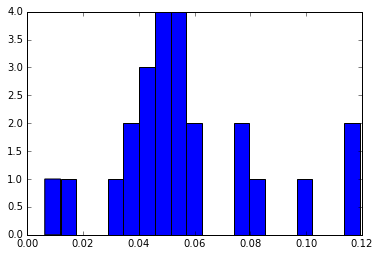

In [45]:
plt.hist(all_aod,20)

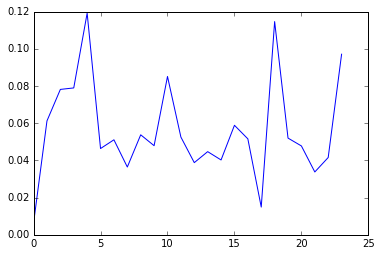

In [47]:
plt.plot(range(0,nbfiles),all_aod)